#### Question1: 1) Delivery_time -> Predict delivery time using sorting time 

##### Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 300
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import statsmodels.formula.api as smf

In [24]:
df=pd.read_csv(r'C:\Users\DELL\Downloads\delivery_time.csv')
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


### <font color ='Brown'> EDA and Visualization

In [4]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 468.0 bytes


#### Checking Data type of columns

In [6]:
df.dtypes

Delivery Time    float64
Sorting Time       int64
dtype: object

#### Checking for null values

In [8]:
df.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

#### Checking for duplicate values

In [10]:
df.duplicated().sum()

0

#### <font color= ' Brown'>As we can see that there is no invalid values , duplicates or null values in our dataset. We can proceed with further steps.
   

array([[<Axes: title={'center': 'Delivery Time'}>,
        <Axes: title={'center': 'Sorting Time'}>]], dtype=object)

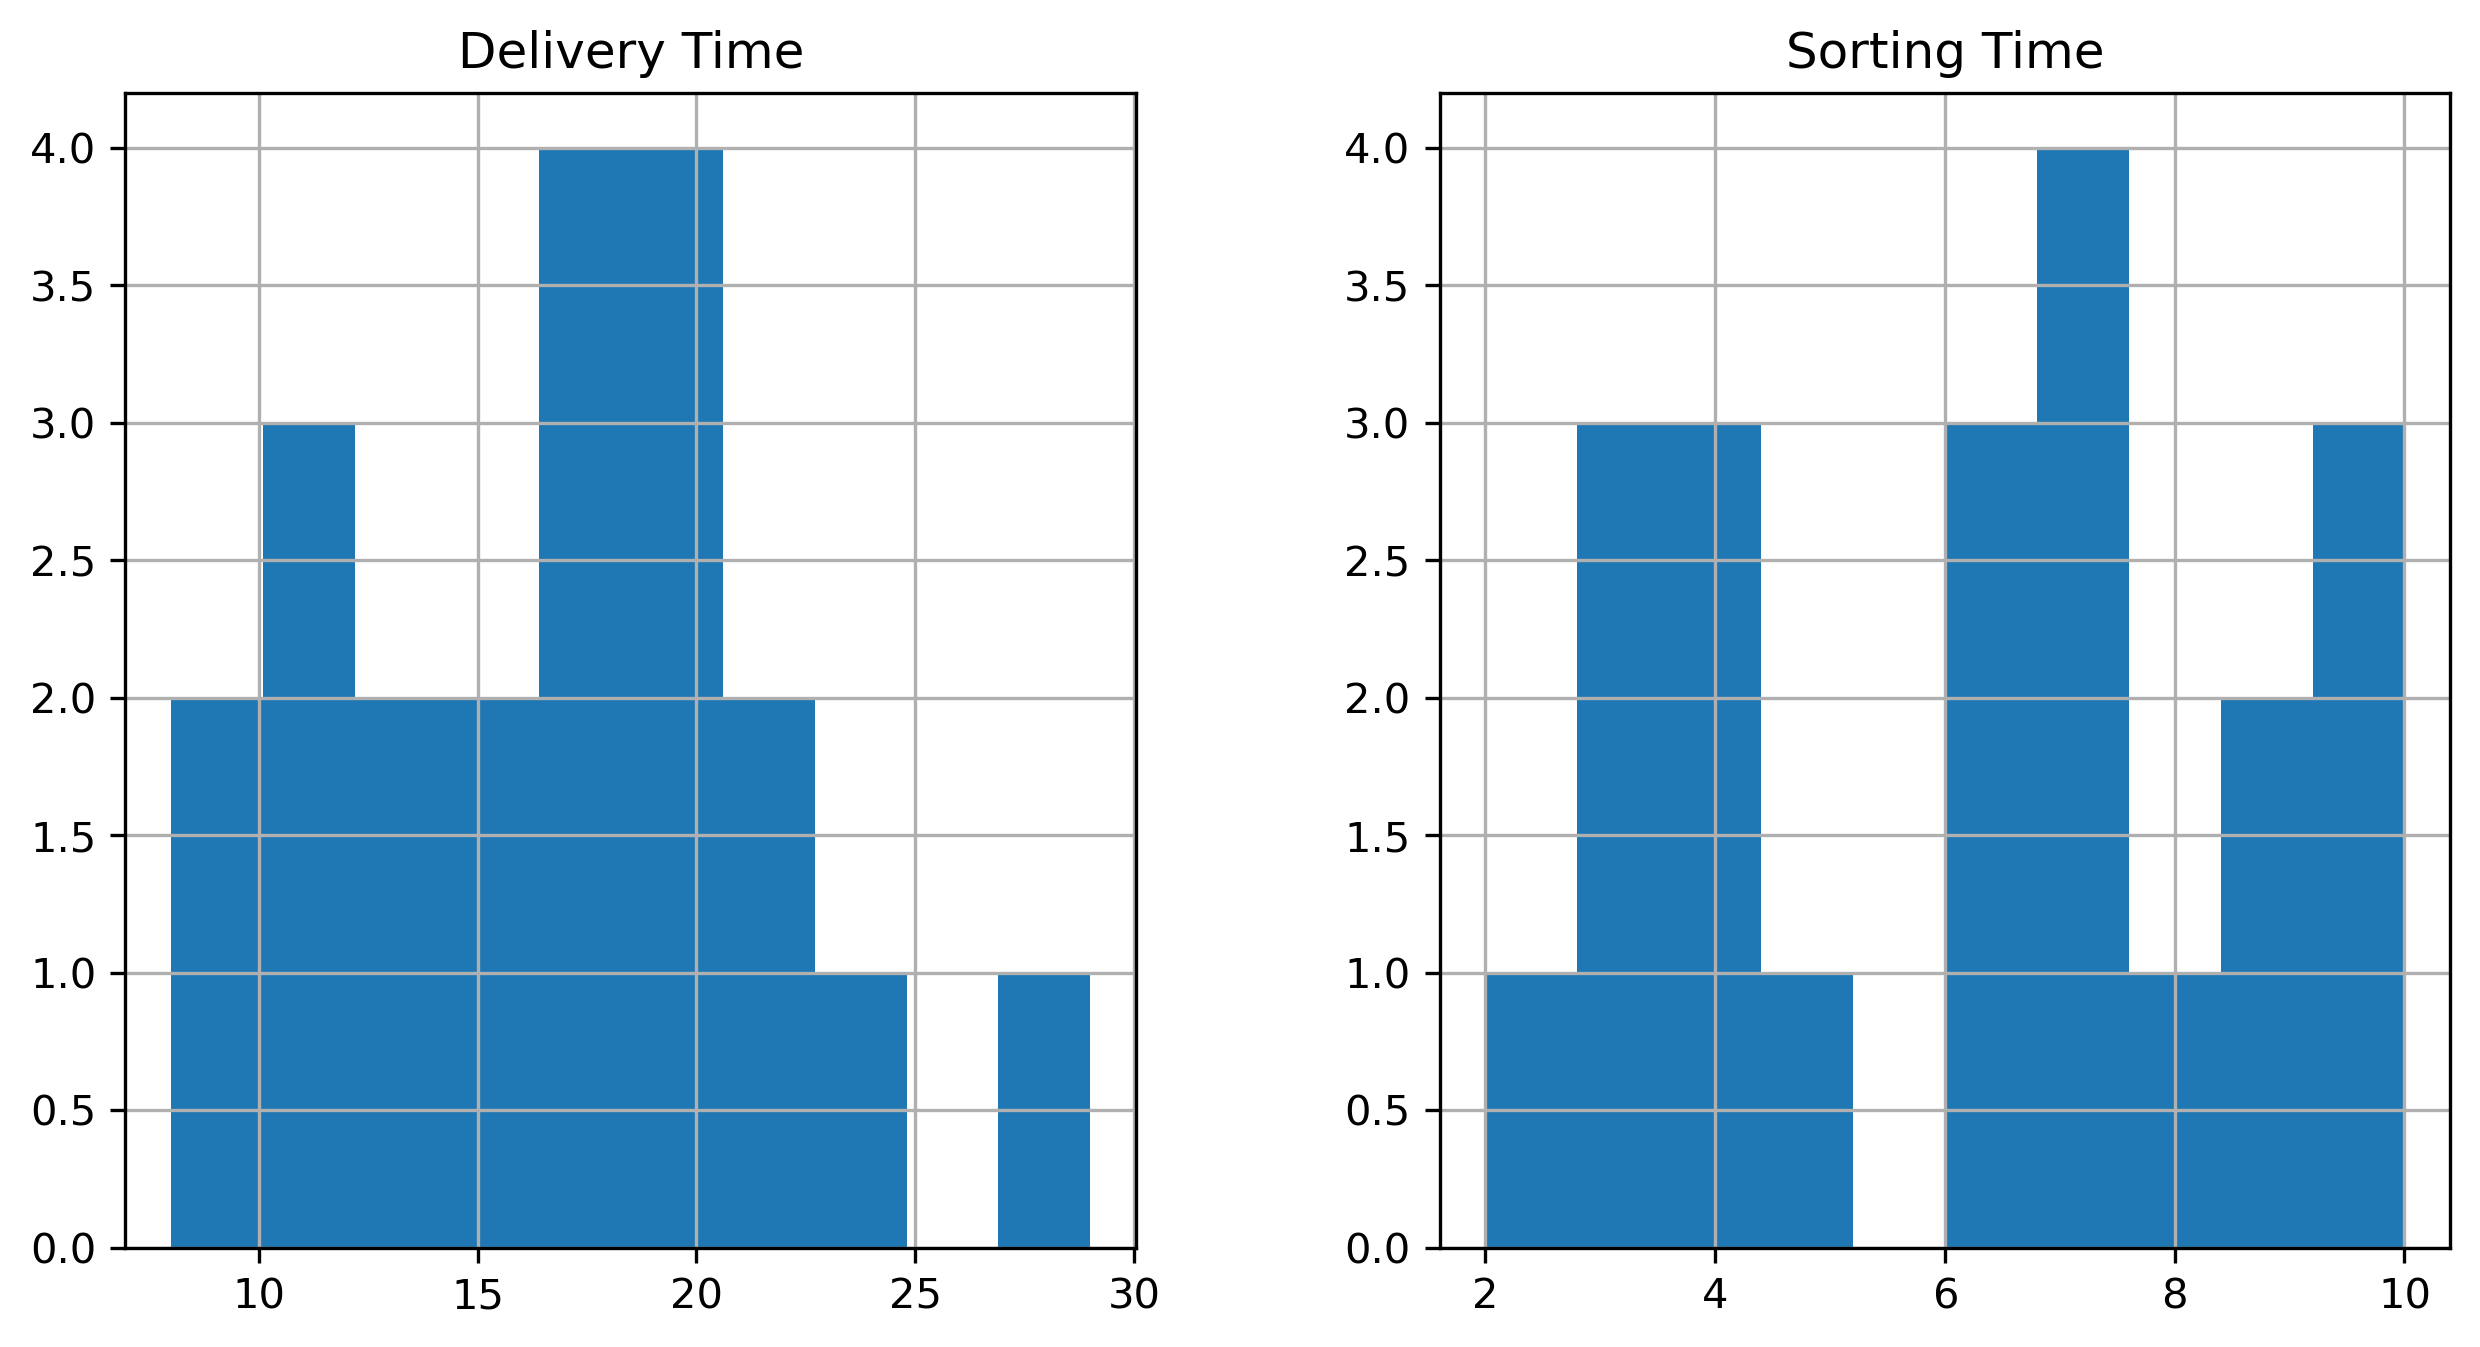

In [11]:
df.hist()

<Axes: >

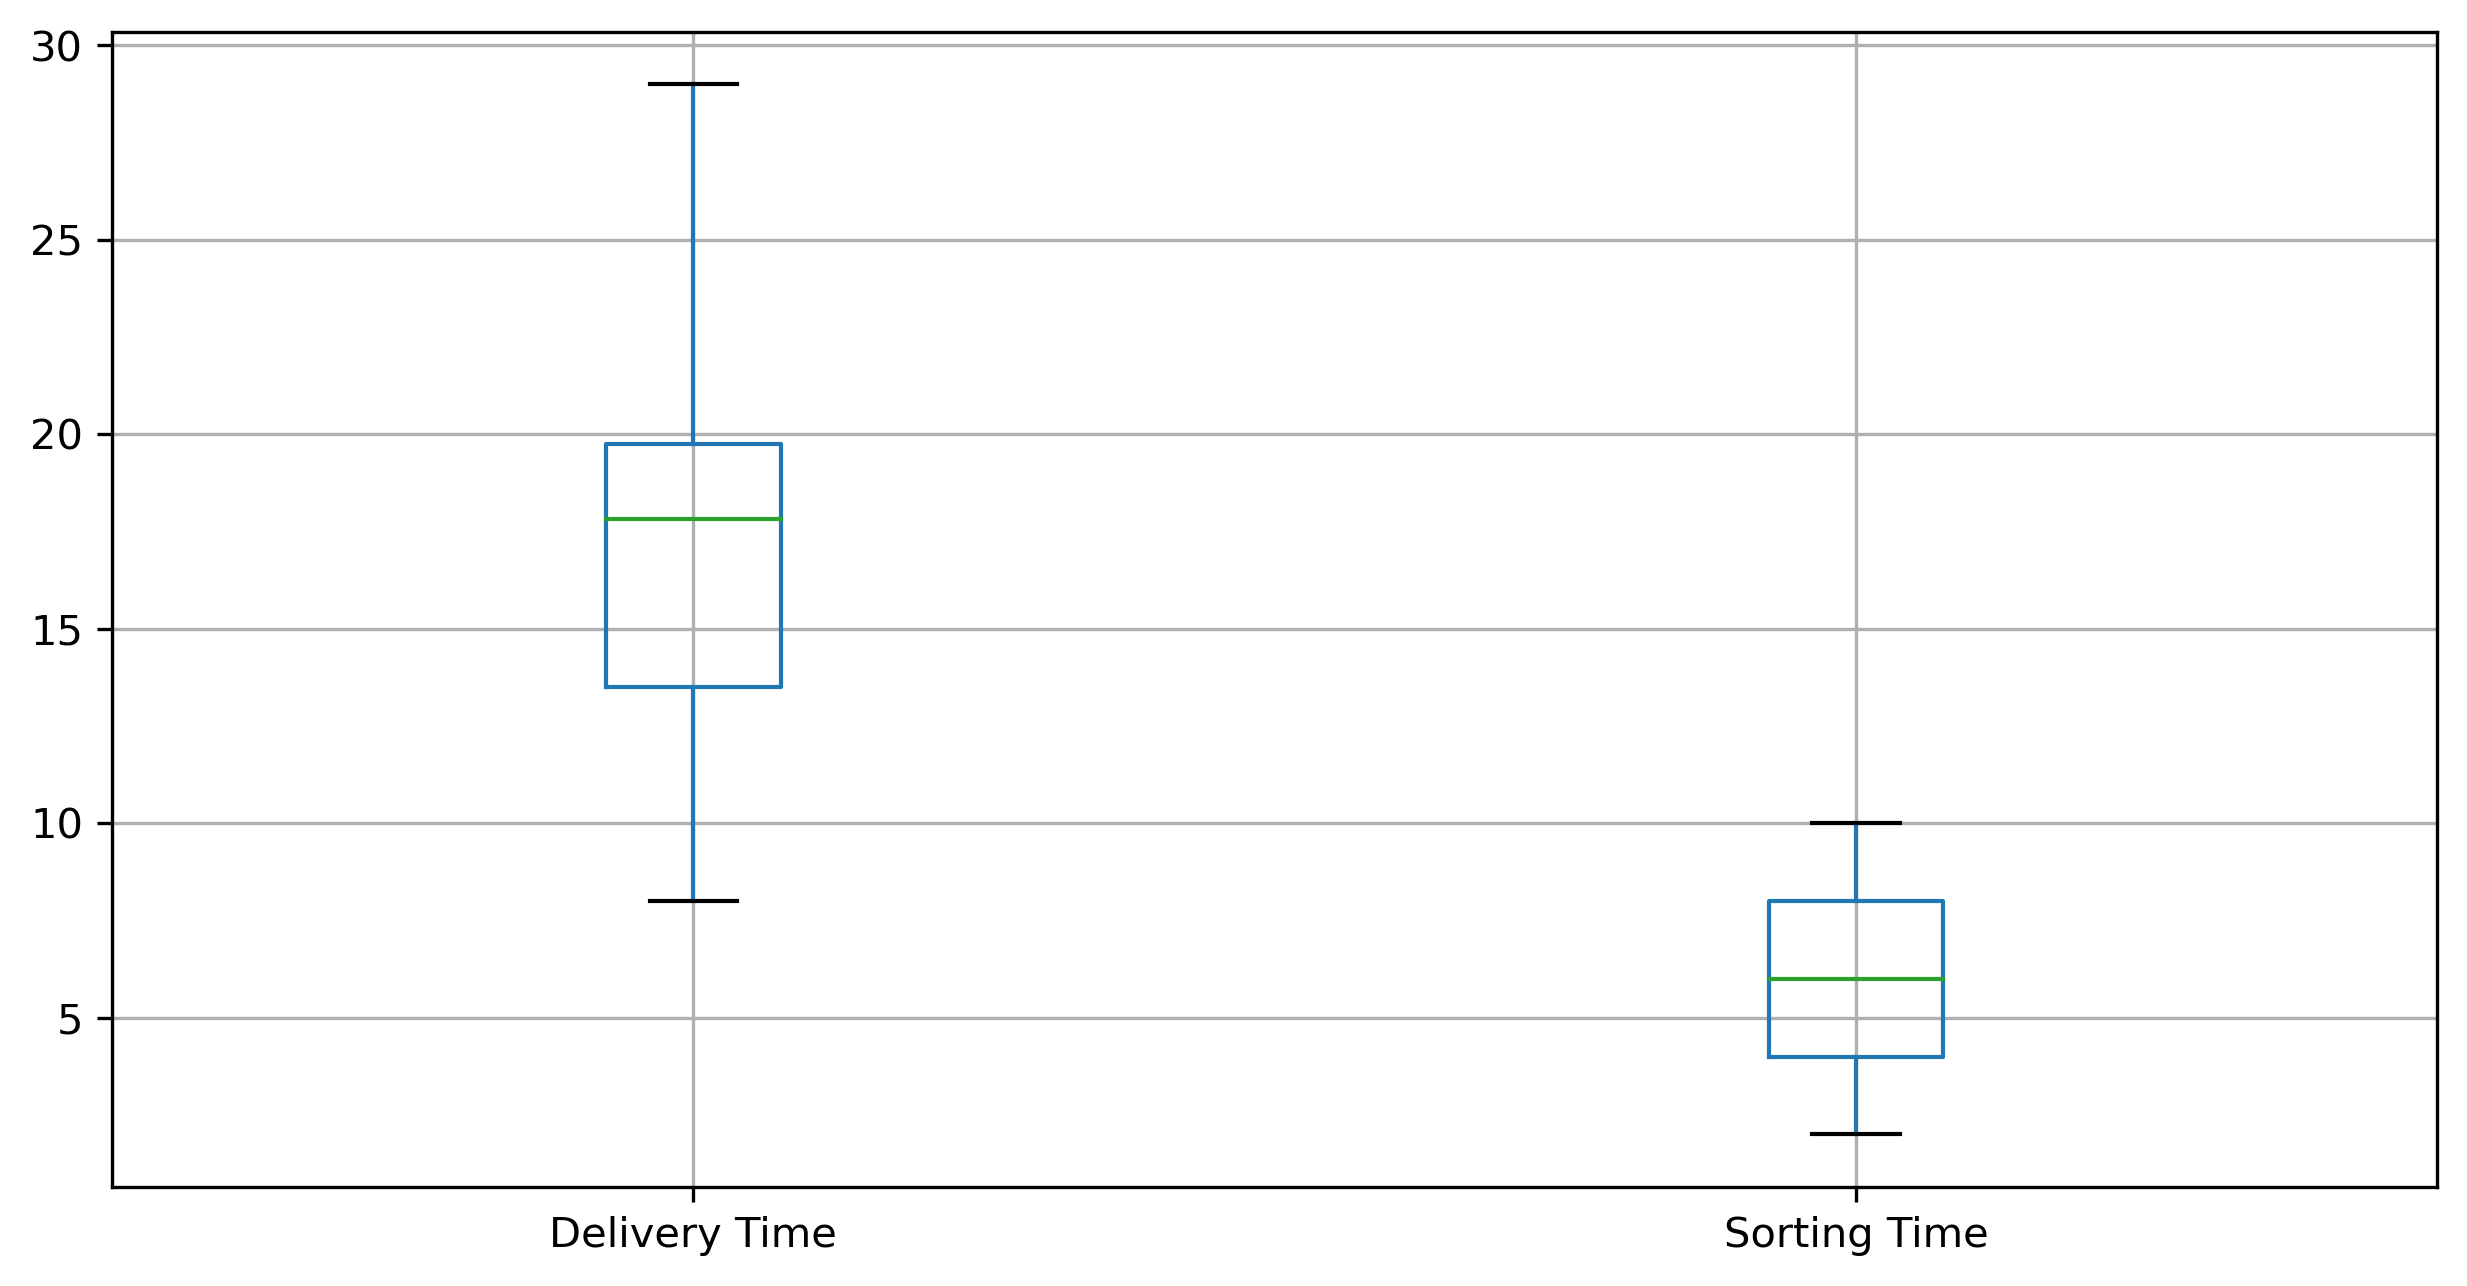

In [12]:
df.boxplot()

<Axes: xlabel='Delivery Time', ylabel='Density'>

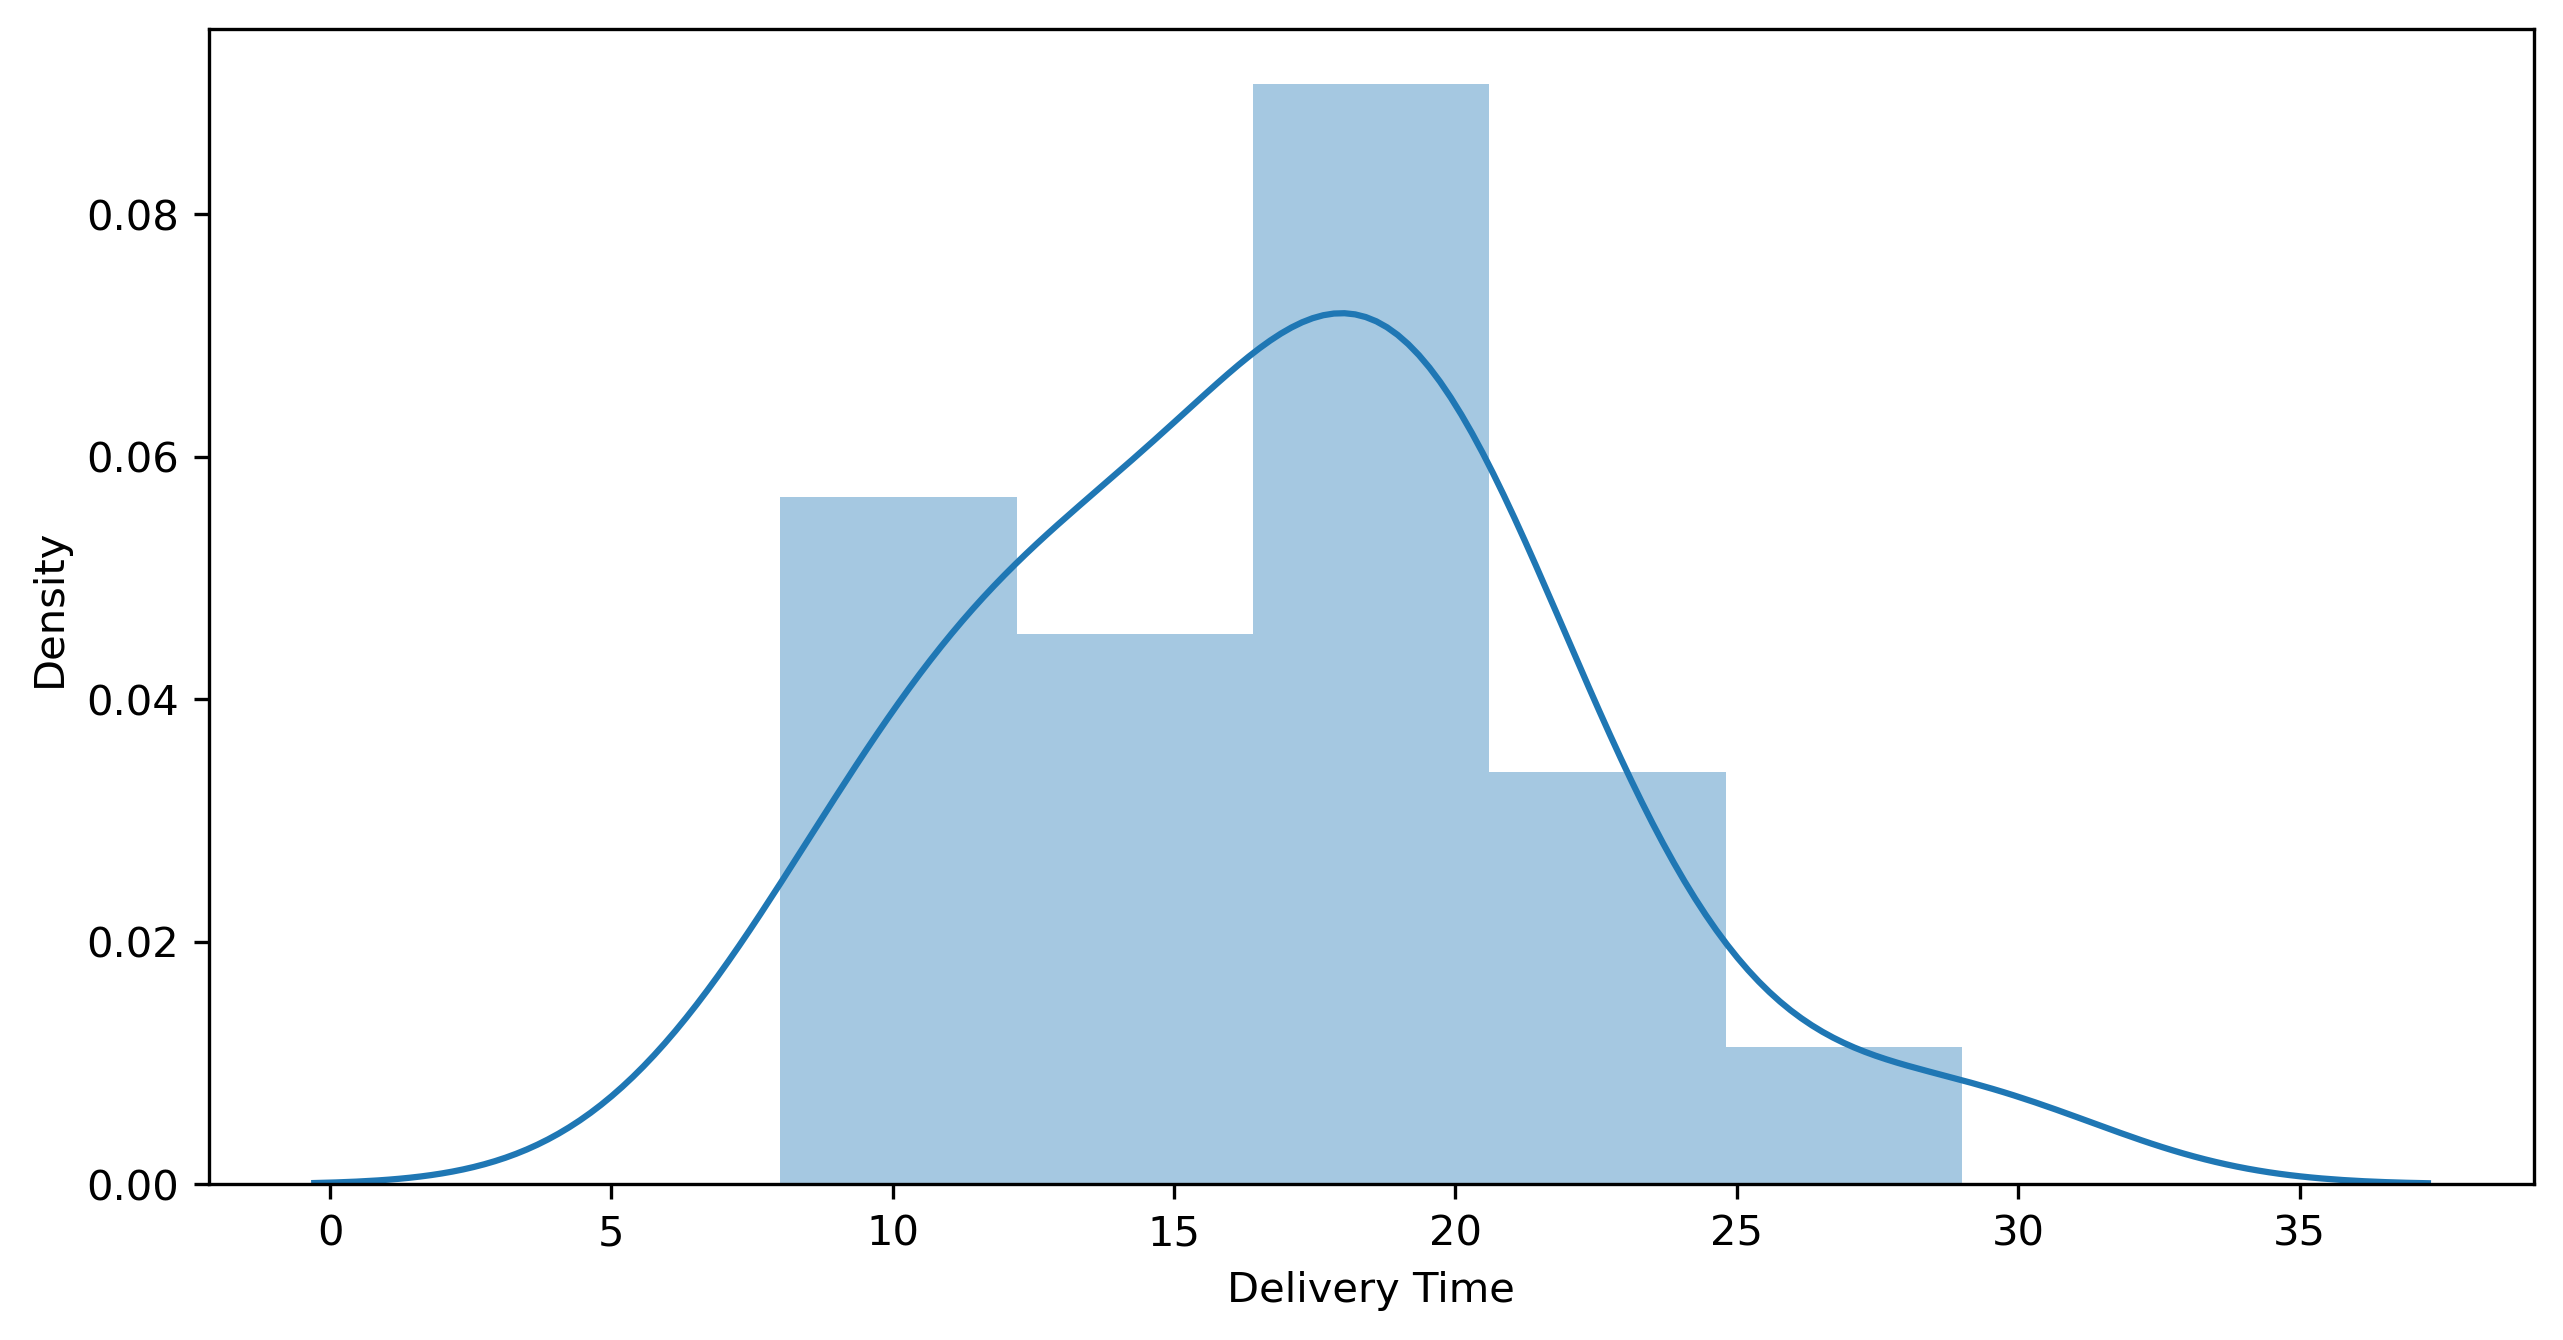

In [13]:
sns.distplot(df['Delivery Time'])

<Axes: xlabel='Sorting Time', ylabel='Density'>

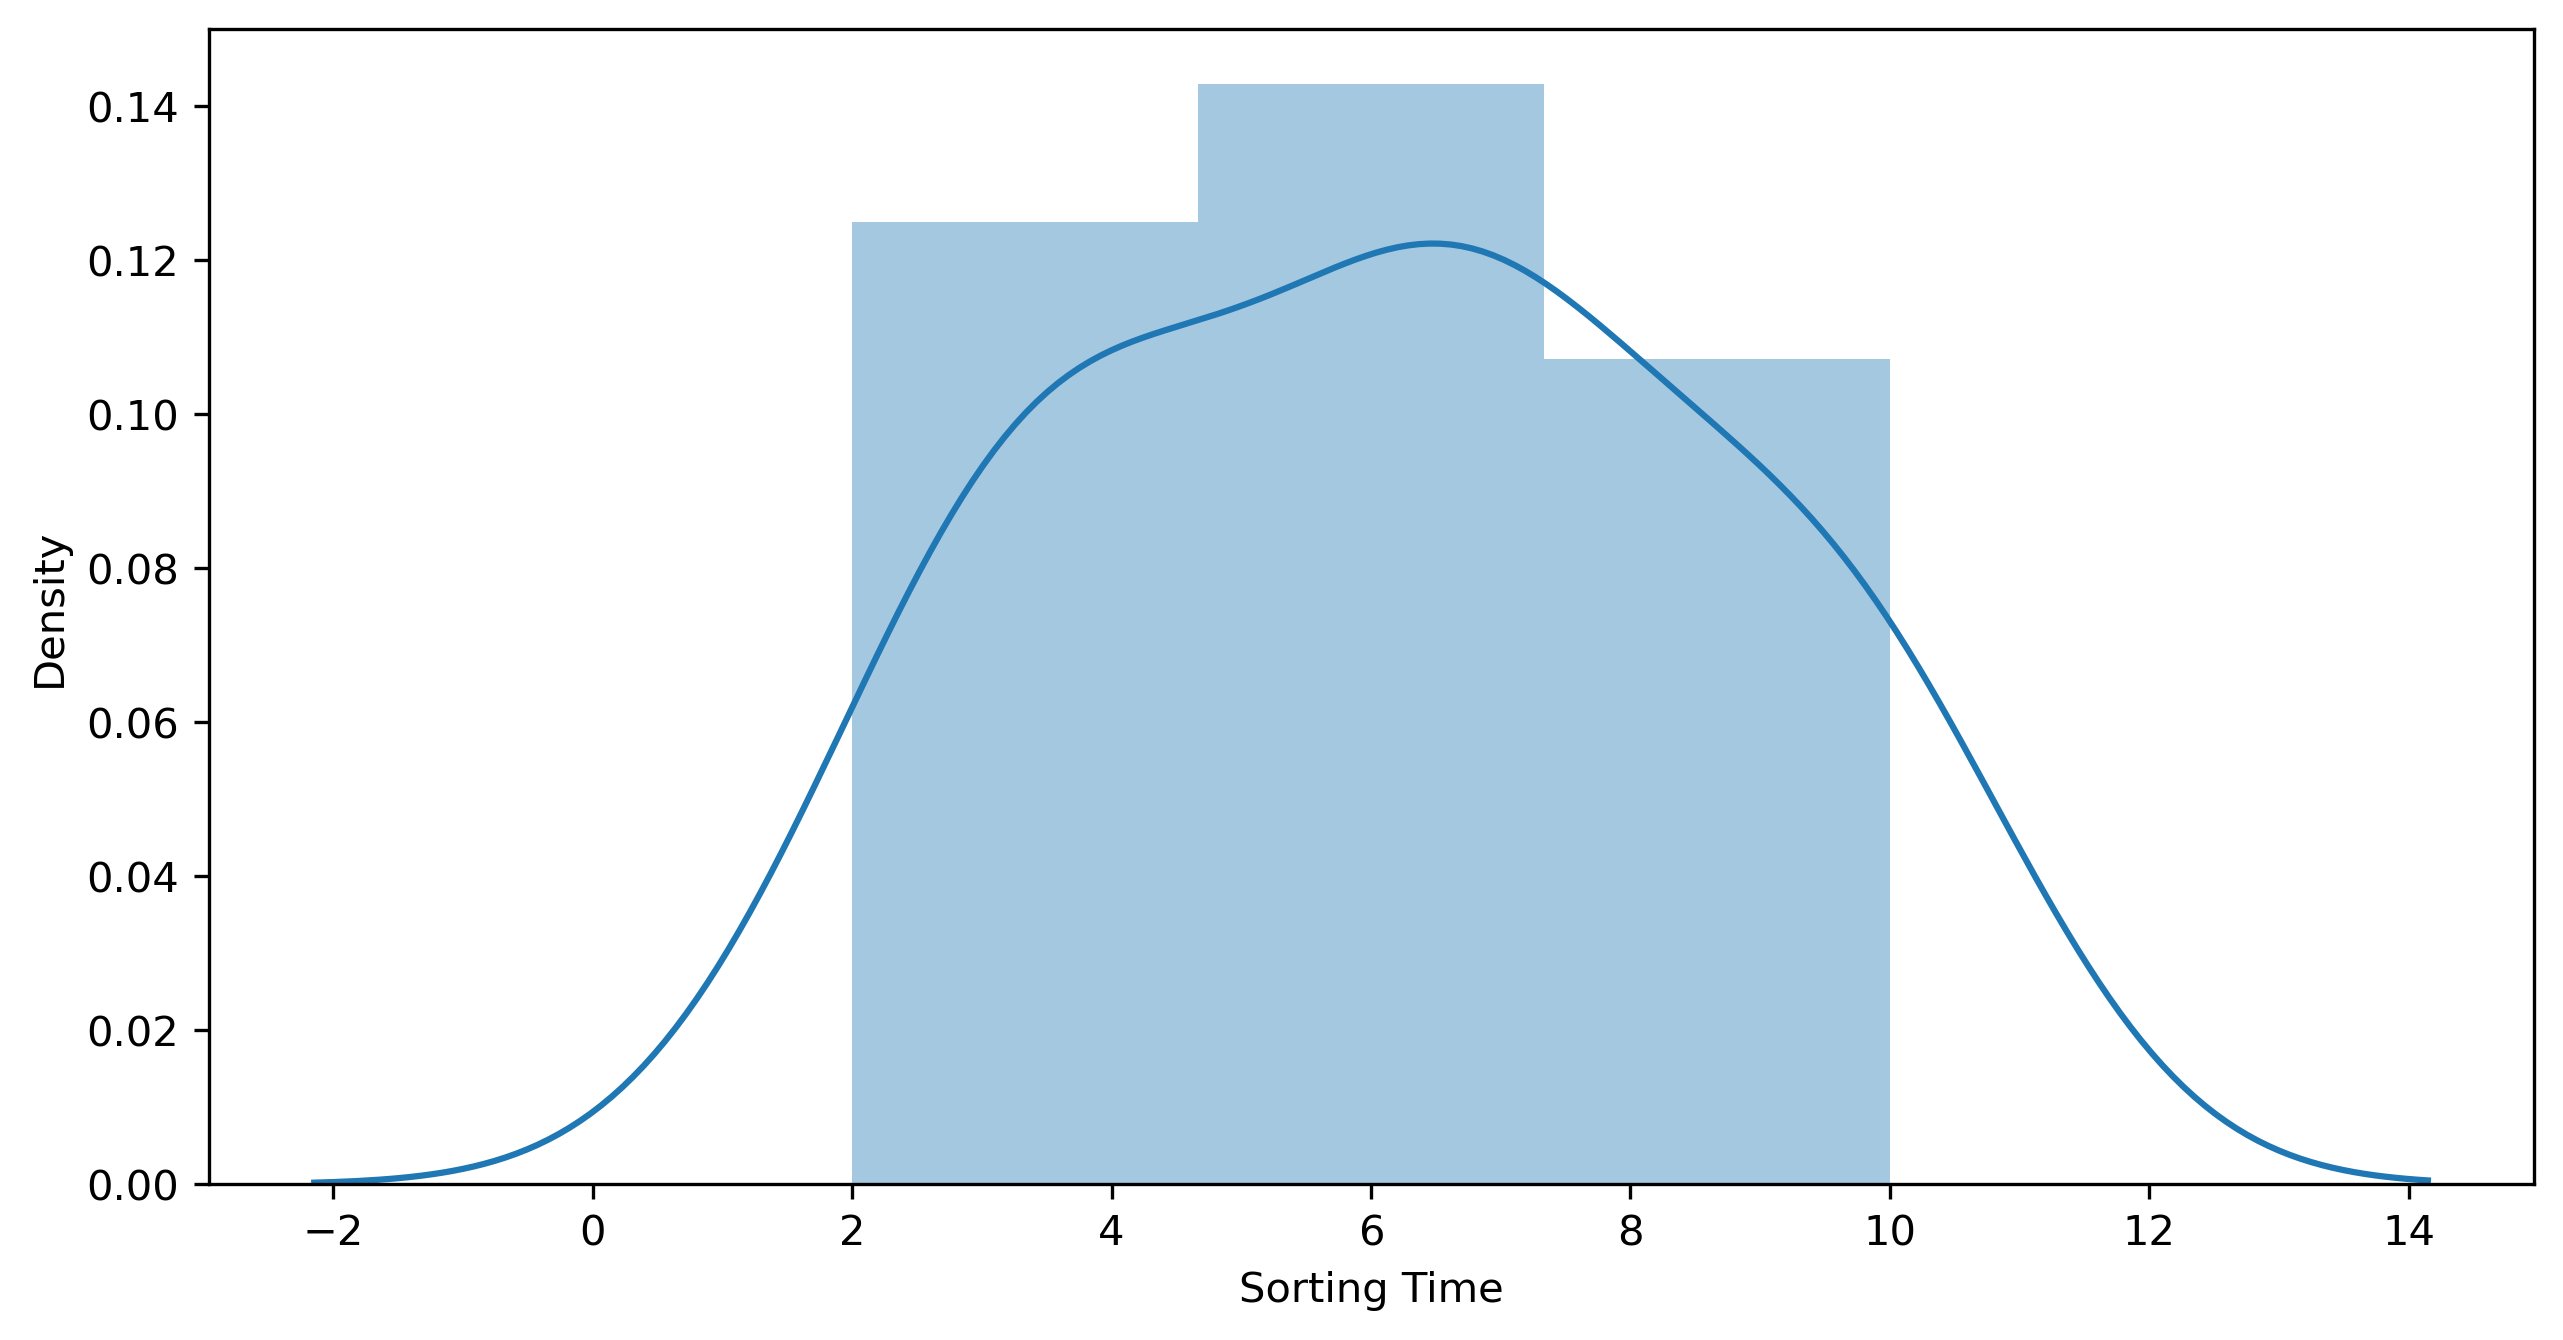

In [14]:
sns.distplot(df['Sorting Time'])

#####  <font color = 'Brown'>Upon seeing the above graphs we can say that there is no outliers in given dataset further we can check for correlation between the coloums. </font> 

#### Featuring

In [18]:
# Renaming Column
df1=df.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
df1

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


#### Correlation Analysis

In [16]:
df.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


#### Visualing the correlation

<Axes: xlabel='Sorting Time', ylabel='Delivery Time'>

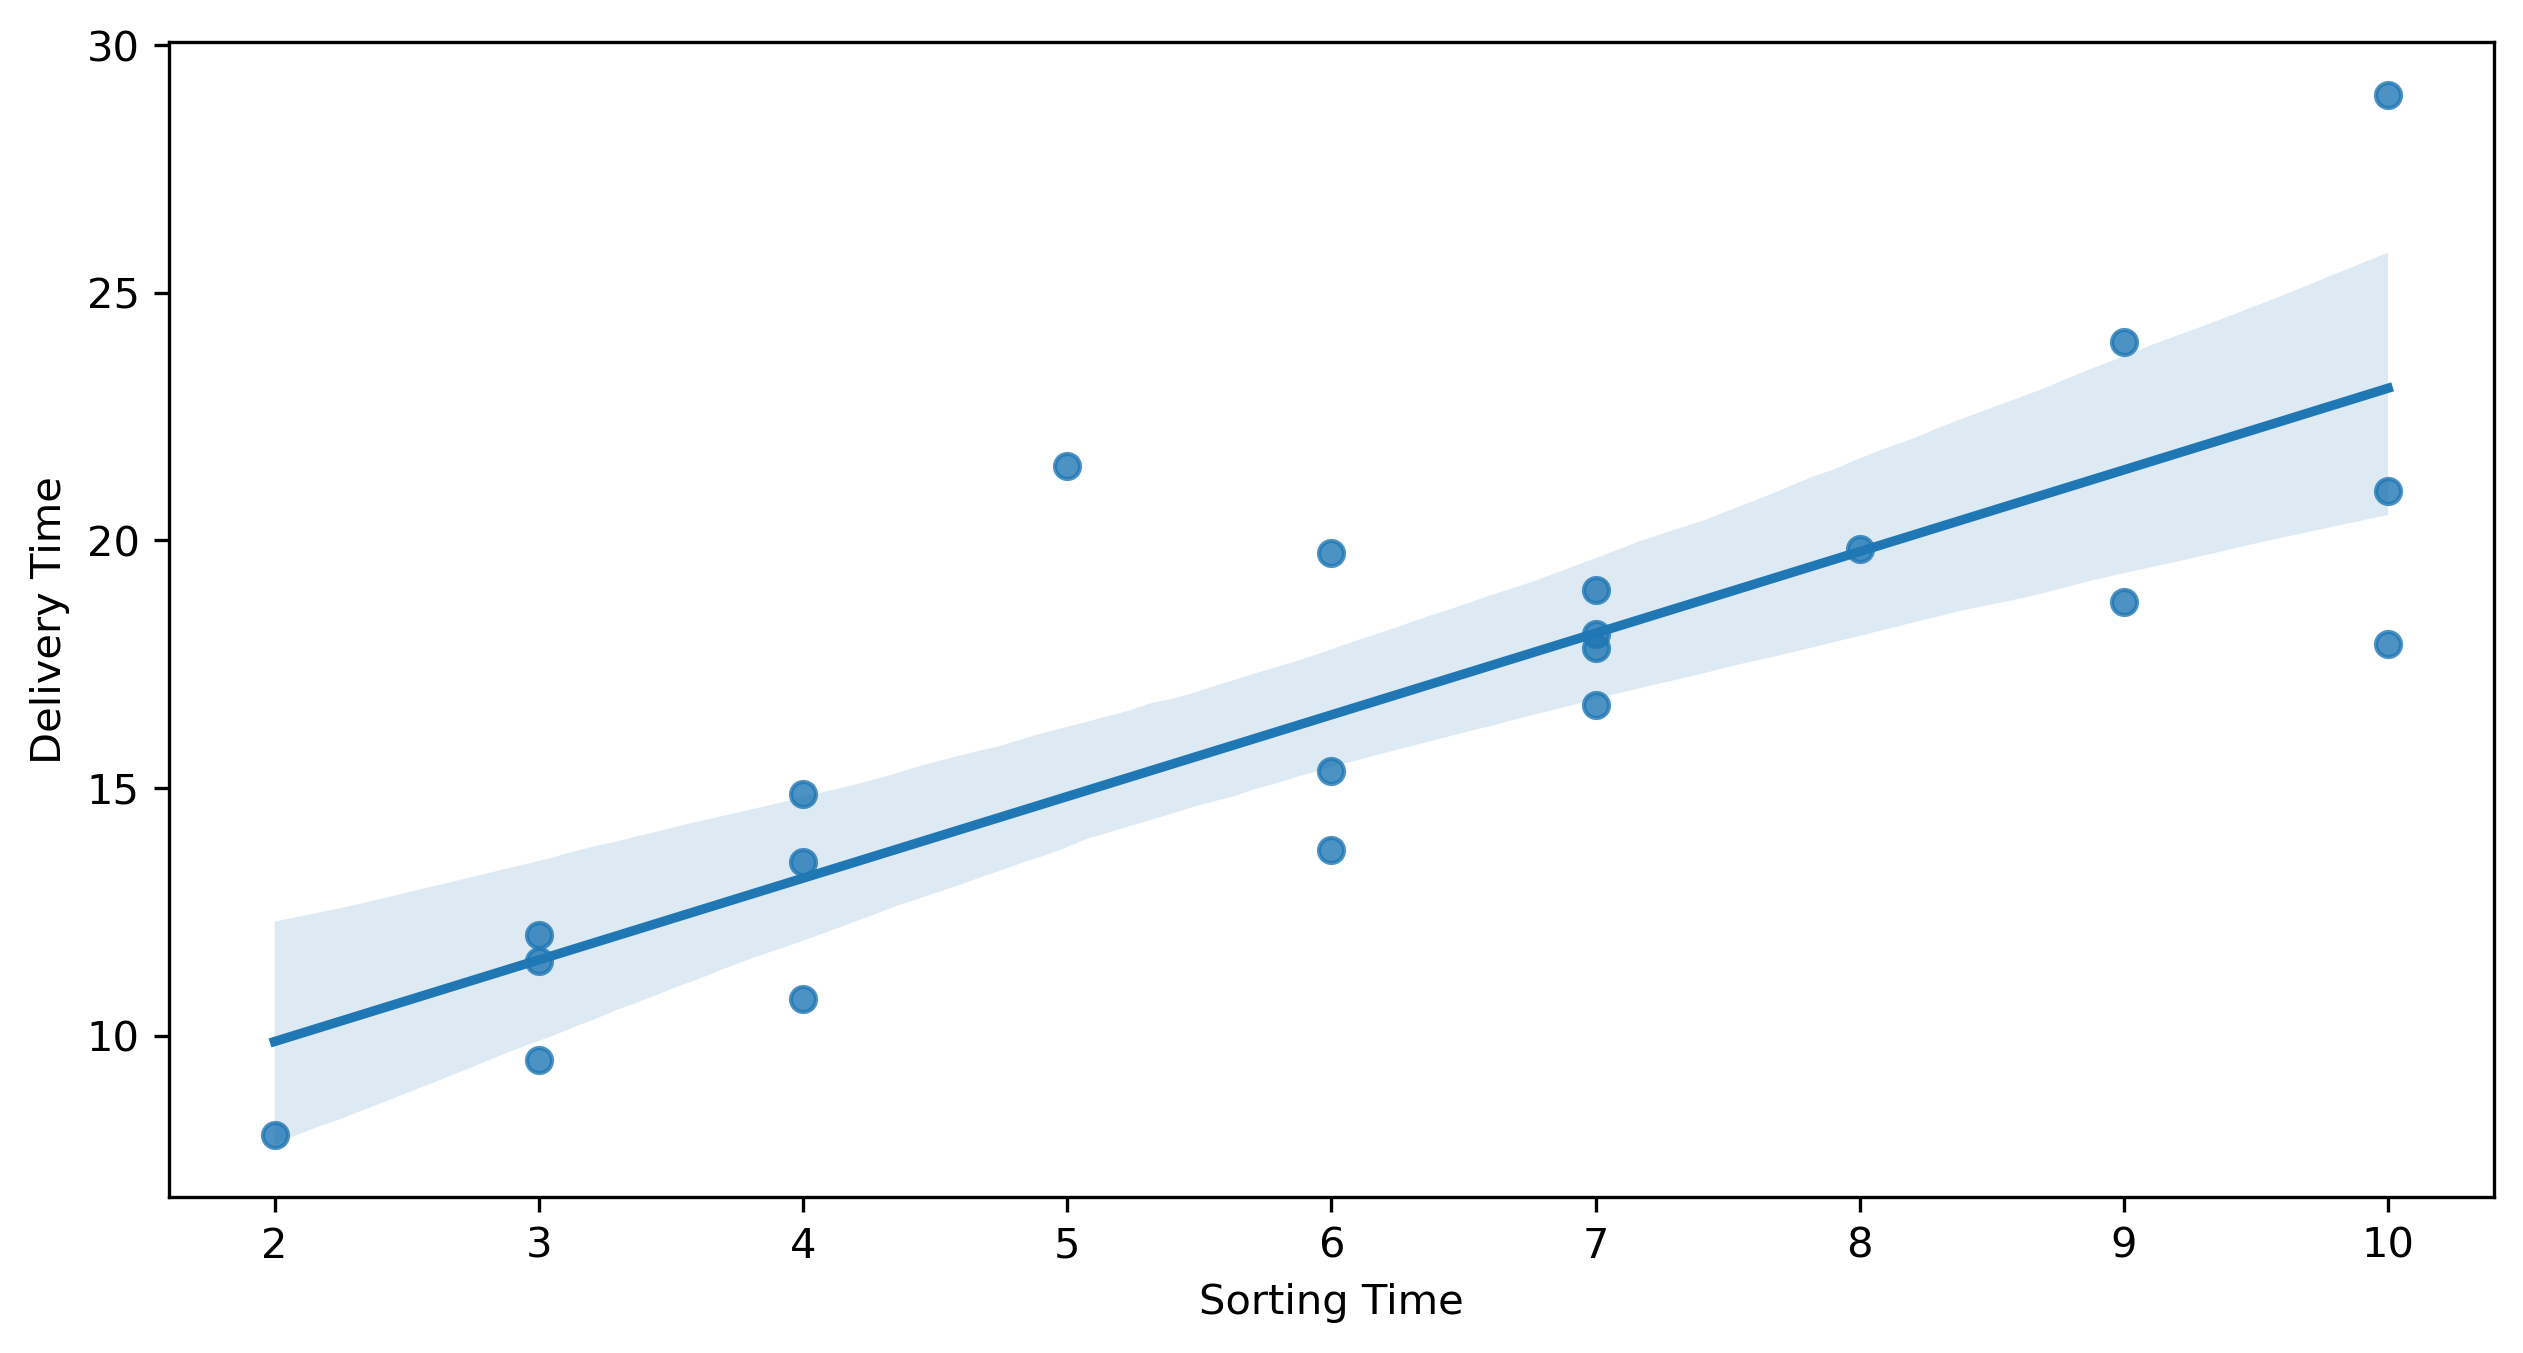

In [26]:
sns.regplot(x=df['Sorting Time'], y=df['Delivery Time'])

<Axes: >

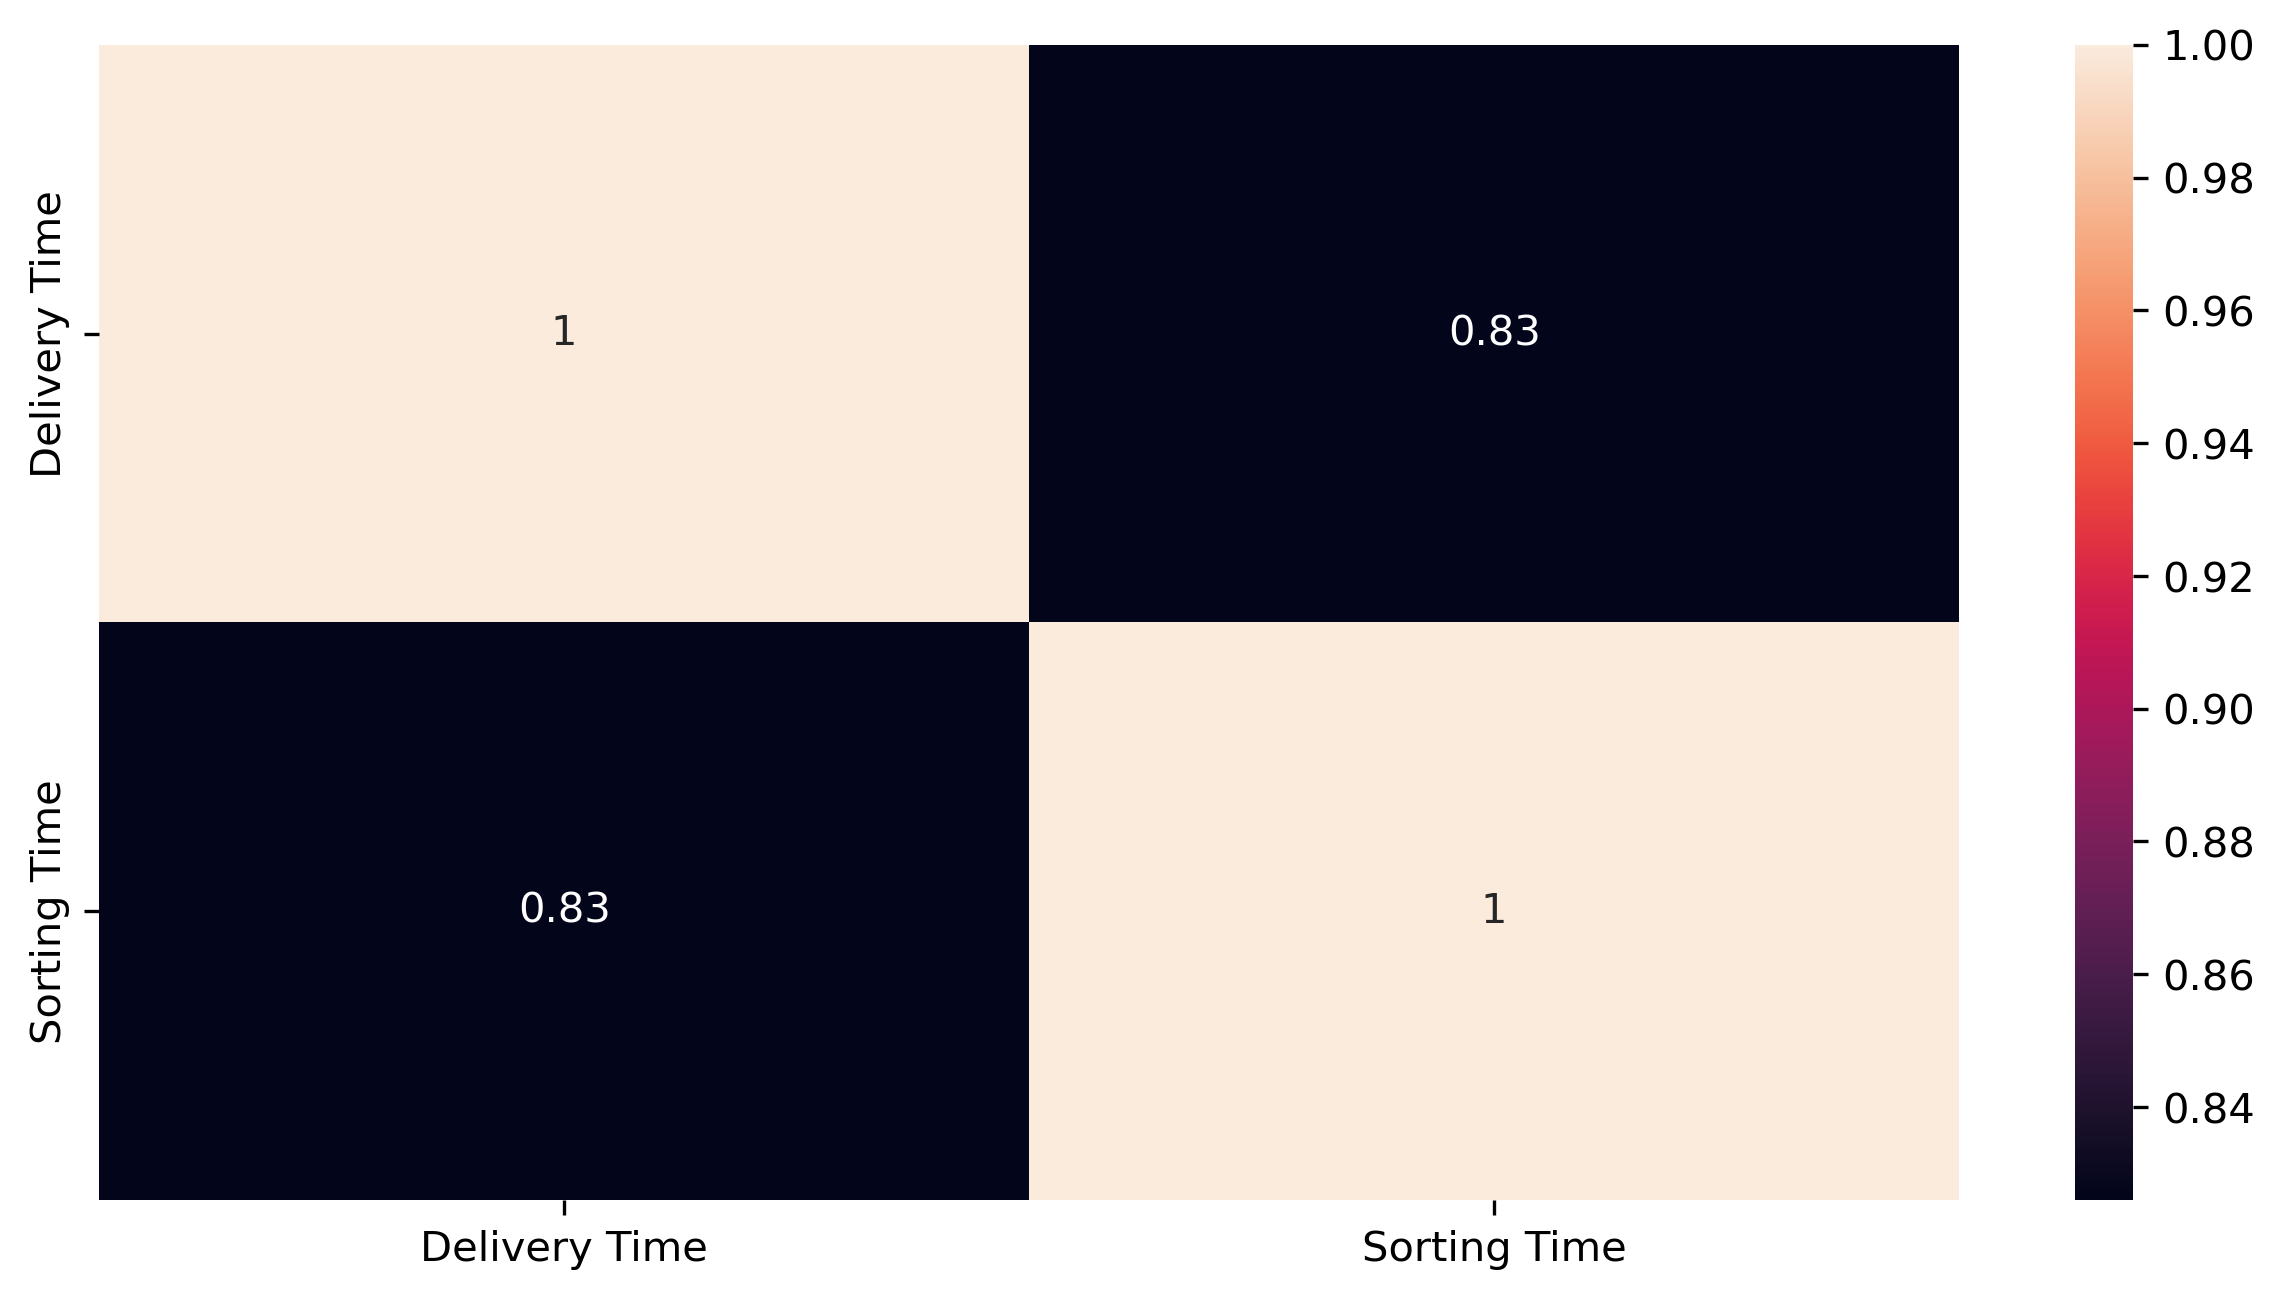

In [27]:
sns.heatmap(df.corr(),annot=True)

#### <font color= 'Brown'>  Upon checking the above graphs and correlation coefficent we can say that there is good correlation between the two variable.The score is more than 0.8 which is a good sign.

In [35]:
model=smf.ols("delivery_time~sorting_time",data=df1).fit()
model

In [36]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Thu, 01 Feb 2024   Prob (F-statistic):           3.98e-06
Time:                        01:02:04   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
model.params  #parameters slope and intercept

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [38]:
model.pvalues   #pvalues for model

Intercept       0.001147
sorting_time    0.000004
dtype: float64

In [39]:
#r2 value
model.rsquared, model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

#### Calculating manually predicted value for verifying model generated predicted values.

In [40]:
# Manual prediction for say sorting time 5
delivery_time = (6.582734) + (1.649020)*(5)
delivery_time

14.827834

In [44]:
# Manual prediction for say sorting time 5
delivery_time = (6.582734) + (1.649020)*(8)
delivery_time

19.774894

#### Calculating delivery time for sorting time 5 and 8

In [41]:
# Automatic Prediction for say sorting time 5, 8
new_data=pd.Series([5,8])
new_data

0    5
1    8
dtype: int64

In [42]:
data_pred=pd.DataFrame(new_data,columns=['sorting_time'])
data_pred

,sorting_time
0,5
1,8


In [43]:
model.predict(data_pred)

0    14.827833
1    19.774893
dtype: float64

##### As we can see our manaully predicted values are equal to values predicted by model.